### CE4031: Exam 1 notebook

This notebook contains the following problems, which award points as listed below:

- Linear Regression problem: **30 points**
- ANN problem: **30 points**

Total: **60 points**

Before getting started, make sure you run the code cell below to load all the required modules and functions. No additional module should be used:

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPClassifier

## Linear Regression

The linear regression problem listed in this section uses [sklearn's *LinearRegression* class](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html). The problem contains three parts:
- a data load and plot
- a linear model fit
- a model extraction and printout

**Data load and plot:** you have nothing to do here, this code cell simply loads and plots the data that the problem will be using. The problem's data contains two columns: a predictor feature $x$ and a response variable $y$.

**Linear model fit:** fill in the '???' sections in the code so that a linear regression model that predicts $y$ from $x$ is produced that fits the data curve as well as possible. You shouldn't have to modify any other part of the code or make any other additions, but may need to extend the predictor space with additional features.

**Model extraction and printout:** use this code cell to extract the coefficients and intercept of the model just fitted, and use standard Python printing/formatting to print out the equation that corresponds to your model in a human readable "y = f(x)" format. If you run out of time or are unable to properly format the equation, try to at least write out the equation as a comment line in the cell.

### Regression Problem

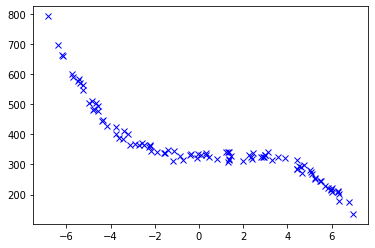

In [12]:
### DATA LOAD AND PLOT
### you have nothing to do here, this is only to load the data and plot it to give you
### a hint as to what kind of model is likely to produce a good fit.

mydata = np.genfromtxt('ce4031_data_1_3.csv', delimiter=',')
x3 = mydata[:, 0] ** 3
x2 = mydata[:, 0] ** 2
x = mydata[:, 0]

y = mydata[:, 1]

plt.plot(x,y, 'bx')
plt.show()

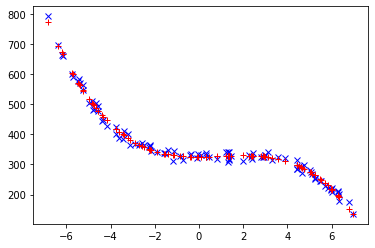

In [14]:
### LINEAR MODEL FIT
### replace the ??? sections with code so that the trained model (red) fits the data (blue) adequately

predictors = np.column_stack((x3, x2, x)) # if you only have one predictor, replace 'np.column_stack' with 'np.vstack'
response = np.vstack(( y ))

model = LinearRegression().fit(predictors, response )

plt.plot(x,y, 'bx')
plt.plot(x, model.predict(predictors)[:,0], 'r+')
plt.show()

In [15]:
### MODEL EXTRACTION AND PRINTOUT
### use this code cell to extract the parameters you need from the fitted model
### and print out the model's y = f(x) equation
print("Intercept {}".format(model.intercept_))

print("Coefficients {}".format(model.coef_))

print("y={}x+{}".format(model.coef_[0][0], model.intercept_[0]))

Intercept [325.31452557]
Coefficients [[-0.98636308  2.89932782  0.34259236]]
y=-0.9863630815847166x+325.31452556689334


## Artificial Neural Networks

The following ANN problem uses [sklearn's *MLPClassifier* class](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html) as well as [sklearn's *train_test_split()* function](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html).

The problem contains three parts:
- a data load and plot
- a train/test data split
- an ANN model fit

**Data load and plot:** you have nothing to do here, this code cell simply loads and plots the data that the problem will be using. The problem's data contains three columns: two predictor features $a$ and $b$ and a class feature called $group$.

**Train/test data split:** fill in the '???' section with code so that the source data is split into two partitions. 70% of the data should go into the training set, and the other 30% into the testing set. You shouldn't have to modify any other part of the code or make any other additions.

**ANN model fit:** fill in the '???' sections with code so that a MLPClassifier model is trained from the trainin data set, with the specific model parameters given in the code cell comments. You shouldn't have to modify any other part of the code or make any other additions. If you train the model with the requested parameters, you should consistently get over 90% accuracy on both training and testing data. Make sure you rerun the cell a few times to ensure that this is generally the case.

### ANN Problem

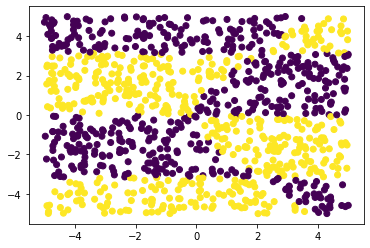

In [16]:
### DATA LOAD AND PLOT
### you have nothing to do here, this is only to load the data and plot it
### so you have an idea of the kind of classification we're trying to achieve.

mydata = np.genfromtxt('ce4031_data_2_1.csv', delimiter=',')
a = mydata[:, 0]
b = mydata[:, 1]
group = mydata[:, 2]

plt.scatter(a,b, c=group)
plt.show()

Training data: 


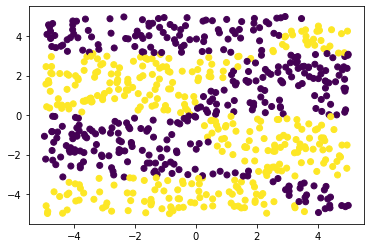

Testing data: 


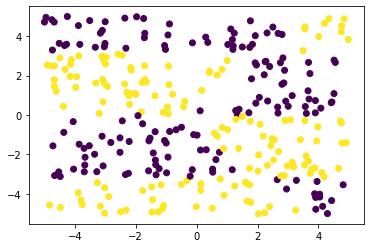

In [17]:
### TRAIN/TEST DATA SPLIT
### replace the ??? section with code so that the source data is split into two partitions:
###   - 70% into the training set
###   - 30% into the testing set

X = np.column_stack((a, b))
Y = group

# split data
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, train_size=.7, test_size=.3)

# print out mean accuracy of trained model on the testing data
print("Training data: ")
plt.scatter(X_train[:,0], X_train[:,1], c=Y_train)
plt.show()

# print out mean accuracy of trained model on the training data
print("Testing data: ")
plt.scatter(X_test[:,0], X_test[:,1], c=Y_test)
plt.show()

Training data accuracy: 0.9442857142857143


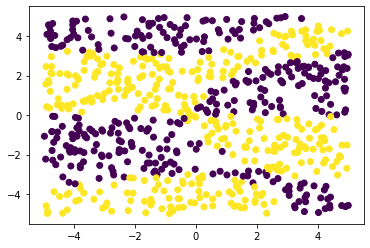

Testing data accuracy: 0.93


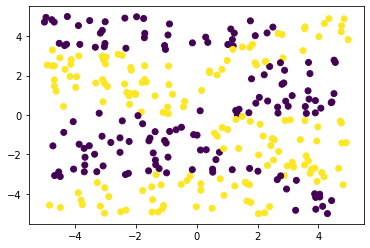

In [18]:
### ANN MODEL FIT
###
### replace the ??? sections with code so that a MLPClassifier model is trained with the following parameters:
###    - 2 hidden layers containing 8 neurons each
###    - the hyperbolic tan function as the hidden layers activation function
###    - the adam solver for weight optimisation
###    - an initial learning rate of 0.001
###    - minibatches of 10 samples each
###    - maximum 5000 training iterations


# create new model
model = MLPClassifier( hidden_layer_sizes=(8, 8), activation='tanh', solver='adam', learning_rate_init=0.001, batch_size=10, max_iter=5000)

# fit the classifier to the training data
model.fit( X_train, Y_train )


# print out mean accuracy of trained model on the training data
print("Training data accuracy: " + str( model.score(X_train,Y_train) ))
plt.scatter(X_train[:,0], X_train[:,1], c=model.predict(X_train))
plt.show()

# print out mean accuracy of trained model on the testing data
print("Testing data accuracy: " + str( model.score(X_test,Y_test) ))
plt.scatter(X_test[:,0], X_test[:,1], c=model.predict(X_test))
plt.show()

